In [1]:
import numpy as np
import pandas as pd

from utils import load_parquet_to_df_list, z_normalize
from approximation.paa import PAA
from discretization.sax.sax import SAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.one_d_sax import OneDSAX
from inconsistency.inconsistency import compute_inconsistency_metrics, Weighted, Unweighted
from inconsistency.graphics import plot_inconsistency_metrics

In [2]:
# load time series dataset into dataframe and z-normalize it
path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)


# only select columns with data ('signal') and ignore class labels ('pattern_main_id')
df_norm = pd.concat([z_normalize(df["signal"].to_frame()) for df in df_list], axis=1).iloc[:, :2]
df_norm

,signal,signal
0,2.223633,1.879365
1,2.058567,1.733153
2,1.849589,1.579823
3,1.642328,1.402389
4,1.438219,1.257130
...,...,...
123,1.345195,1.162620
124,1.547908,1.314745
125,1.760490,1.500432
126,1.970141,1.657326


In [3]:
alphabet_size = 9
alphabet_size_slope = 3

sax = SAX(alphabet_size)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size_avg=alphabet_size, alphabet_size_slope=alphabet_size_slope)

sax_variant = sax
window_size = 5
epsilon = 0.01

In [4]:
weighted = Weighted()
unweighted = Unweighted()
inconsistency, bins = compute_inconsistency_metrics(df_norm, window_size, sax_variant, weighted, epsilon)

In [5]:
inconsistency

0    0.10559
1    0.12931
dtype: float64

In [6]:
bins

0    1.260870
1    1.383621
dtype: float64

In [7]:
inconsistency, bins = compute_inconsistency_metrics(df_norm, window_size, sax_variant, unweighted, epsilon)
inconsistency

0    0.111979
1    0.085937
dtype: float64

In [8]:
bins

0    1.265625
1    1.234375
dtype: float64

In [9]:
epsilon_lst = [float("%.9f" % (1e-09 * 10**x)) for x in range(10)]
epsilon_lst

[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

In [10]:
inconsistency_r, bins_r = pd.DataFrame(), pd.DataFrame()
for curr_epsilon in epsilon_lst:
    inconsistency, bins = compute_inconsistency_metrics(df_norm, window_size, sax_variant, unweighted, curr_epsilon)
    inconsistency_r = pd.concat([inconsistency_r, inconsistency.to_frame().T], ignore_index=True)
    bins_r = pd.concat([bins_r, bins.to_frame().T], ignore_index=True)

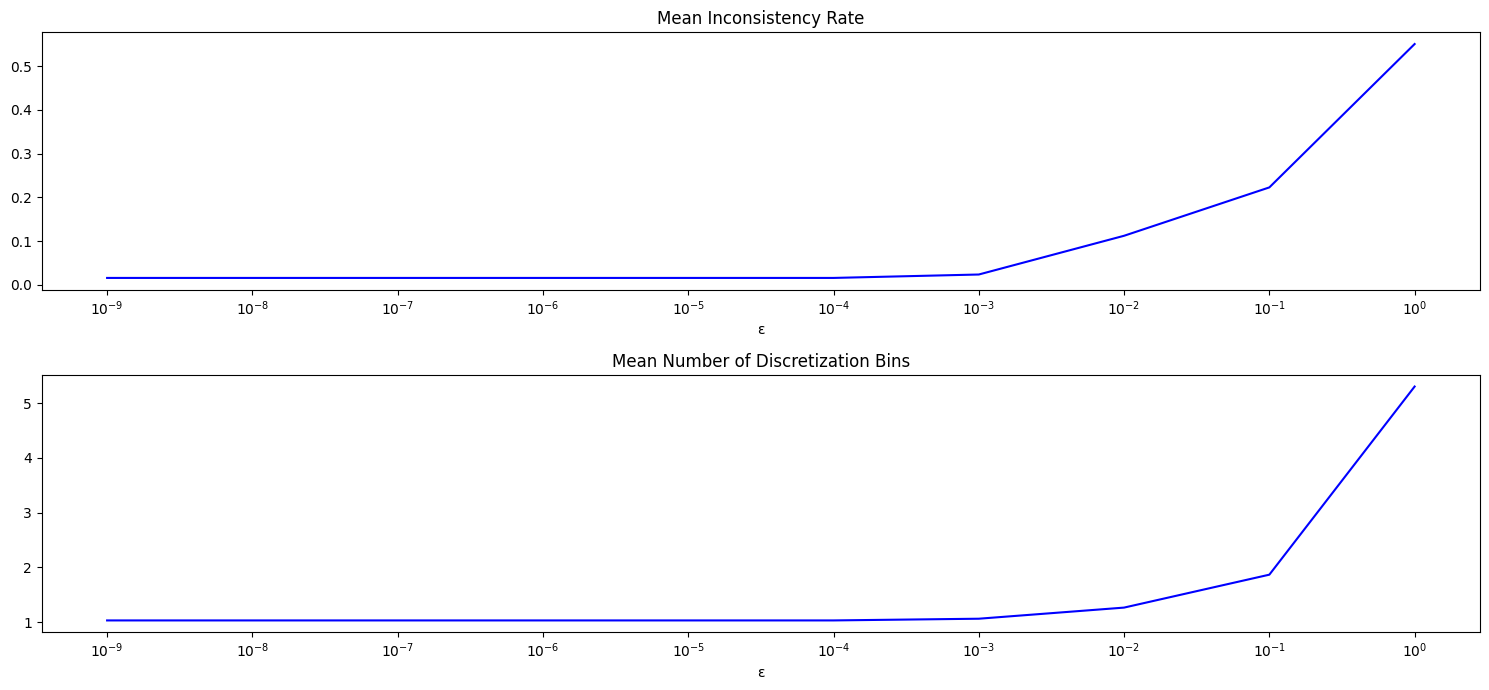

In [11]:
epsilon_symb = "\u03B5"
plot_inconsistency_metrics(inconsistency_r, bins_r, epsilon_lst, 0, x_label=epsilon_symb, x_scale="log")

In [12]:
min_alphabet_size = 2
max_alphabet_size = 10
alphabet_sizes = np.arange(2, 27)

inconsistency_r, bins_r = pd.DataFrame(), pd.DataFrame()
for alphabet_size in alphabet_sizes:
    sax = SAX(alphabet_size)
    inconsistency, bins = compute_inconsistency_metrics(df_norm, window_size, sax, unweighted, epsilon)
    inconsistency_r = pd.concat([inconsistency_r, inconsistency.to_frame().T], ignore_index=True)
    bins_r = pd.concat([bins_r, bins.to_frame().T], ignore_index=True)

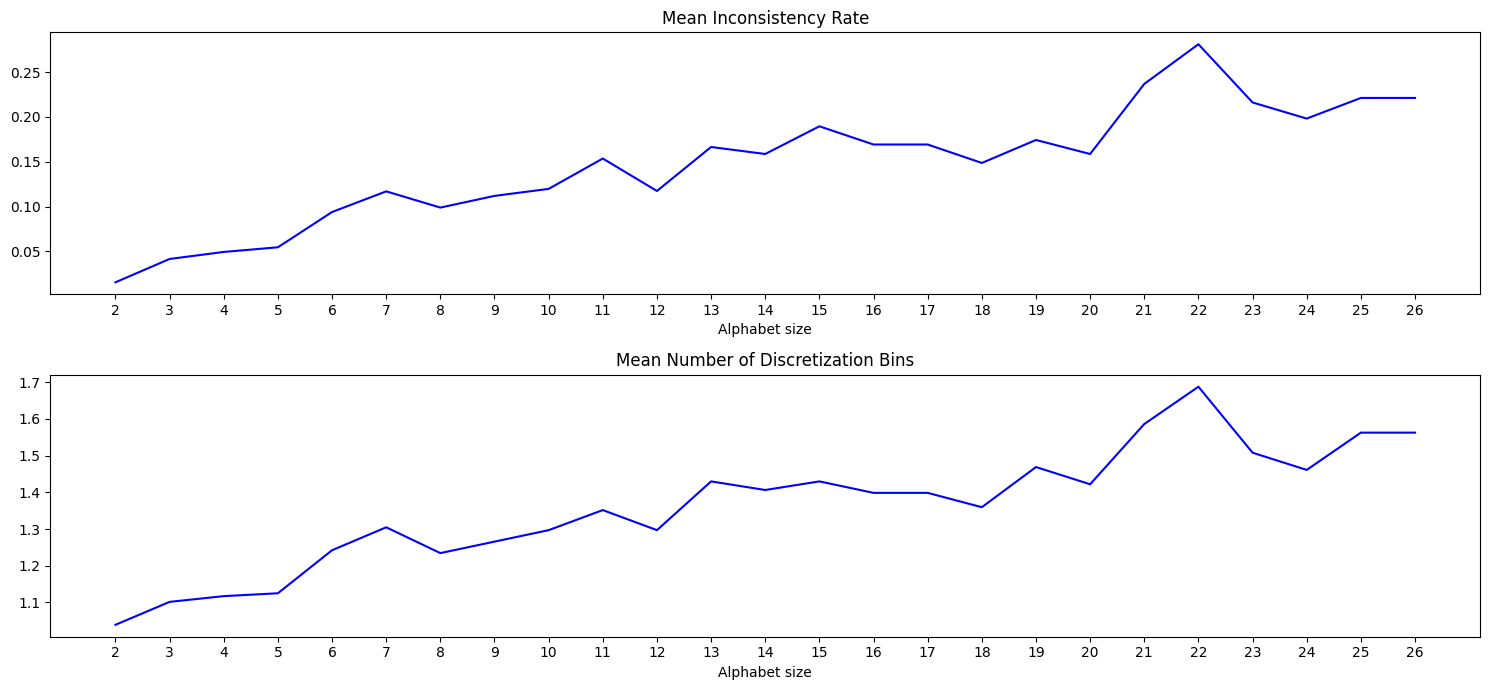

In [13]:
plot_inconsistency_metrics(inconsistency_r, bins_r, alphabet_sizes, 0, x_label="Alphabet size", x_scale="linear")